In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [44]:
# Đọc dữ liệu từ CSV
df = pd.read_csv('stocks_data.csv')

# Kiểm tra và in ra các giá trị thiếu
print("Giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())



Giá trị thiếu trong dữ liệu:
id          0
datetime    0
open        0
high        0
low         0
close       0
volume      0
code        0
dtype: int64


In [45]:
df = df[df['code'] == 'GOOG'].copy()
print(df)




        id    datetime       open       high        low      close    volume  \
4     2000  2020-11-20   88.26050   88.70000   87.09300   87.10950  46270000   
11    1999  2020-11-23   87.48000   87.69500   85.88600   86.74300  43232000   
14    1998  2020-11-24   86.52500   88.58000   86.38450   88.44400  31560000   
21    1997  2020-11-25   88.64450   88.92700   87.82700   88.57150  20916000   
24    1996  2020-11-27   88.65450   90.20000   88.62200   89.65950  17698000   
...    ...         ...        ...        ...        ...        ...       ...   
4976  1005  2024-11-04  171.24001  171.92000  169.48500  170.67999  16194000   
4982  1004  2024-11-05  170.83000  172.09700  170.37000  171.41000  12518300   
4986  1003  2024-11-06  175.35001  178.64000  175.03999  178.33000  27061500   
4992  1002  2024-11-07  179.11000  182.58000  178.89000  182.28000  16730400   
4996  1001  2024-11-08  182.00000  182.35001  179.57001  179.86000  15004600   

      code  
4     GOOG  
11    GOOG  


In [46]:
# Chuyển đổi cột 'date_time_local' thành định dạng datetime và xử lý các giá trị không hợp lệ

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Loại bỏ các dòng có giá trị NaT trong cột 'date_time_local' và điền giá trị thiếu cho 'temperature'

# Chuyển đổi dữ liệu theo dạng ngày và tính nhiệt độ trung bình trong ngày
daily_data = df[['datetime', 'volume']].set_index('datetime')


# Chuẩn bị dữ liệu phân cụm: Sử dụng nhiệt độ cho phân cụm
df_cluster = daily_data[['volume']].copy() # Chỉ dùng cột 'temperature' cho KMeans

In [47]:
print(df_cluster.shape)

(1000, 1)


In [48]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[['volume']])  # Chỉ chuẩn hóa cột nhiệt độ

# Áp dụng KMeans phân cụm vào 4 cụm
kmeans = KMeans(n_clusters=6, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Kết hợp lại cột 'half_year' từ daily_data cho việc điều chỉnh nhãn cụm



In [49]:
print(df_cluster['cluster'].shape)

(1000,)


In [50]:
scatter_data = []
# Vẽ biểu đồ phân cụm theo nhiệt độ hàng ngày


Cluster 0 has 241 rows
Cluster 1 has 301 rows
Cluster 2 has 8 rows
Cluster 3 has 247 rows
Cluster 4 has 140 rows
Cluster 5 has 63 rows


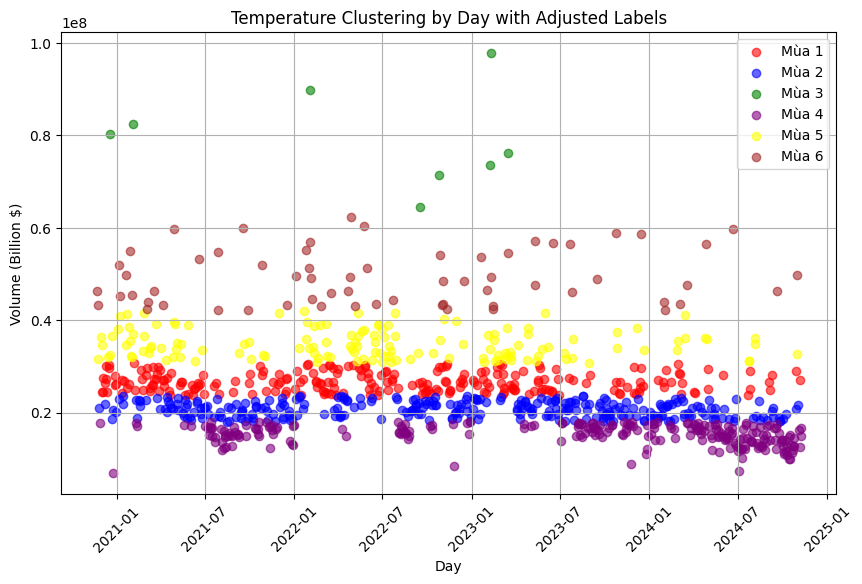

In [51]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple','yellow', 'brown']
for i in range(6):
    subset = df_cluster[df_cluster['cluster'] == i]
    print(f"Cluster {i} has {len(subset)} rows")
    for index, row in subset.iterrows():
        scatter_data.append({
            "index": index,
            "volume": row['volume'],
            "season": i
        })
    plt.scatter(subset.index, subset['volume'], color=colors[i], label=f'Mùa {i+1}', alpha=0.6)
# Lưu scatter_data vào file CSV
scatter_df = pd.DataFrame(scatter_data)
# scatter_df.to_csv('scatter_data.csv', index=False)
plt.title('Temperature Clustering by Day with Adjusted Labels')
plt.xlabel('Day')
plt.ylabel('Volume (Billion $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



In [52]:
scatter_df.to_csv('scatter_data_trend_GOOG.csv', index=False)

In [53]:
print(scatter_df.shape)

(1000, 3)


In [54]:
# df = pd.read_csv('scatter_data_trend.csv')
    
# # Chuyển đổi cột 'index' thành định dạng chuỗi để JSON hóa
# df['index'] = pd.to_datetime(df['index']).dt.strftime('%Y-%m-%d')
# df['year'] = pd.to_datetime(df['index']).dt.year  # Đảm bảo cột 'year' được tạo đúng
# df['season'] = df['season'].map({0: 'Low', 1: 'High', 2: 'Average',3:'Spike', 4:'Ultra_High', 5:'VeryLow'})

# # Tính số ngày trong từng mùa cho mỗi năm
# season_counts = df.groupby(['year', 'season']).size().unstack(fill_value=0)
# # Chuyển đổi dữ liệu thành JSON
# season_counts = season_counts.reset_index()
# season_counts = season_counts.to_dict(orient='records')


In [55]:
# print(season_counts)

In [56]:
# # Vẽ xu hướng nhiệt độ theo ngày
# plt.figure(figsize=(10, 6))
# plt.plot(df_cluster.index, df_cluster['temperature'], marker='o', color='b', label='Daily Temperature')
# plt.title('Daily Temperature Trends')
# plt.xlabel('Day')
# plt.ylabel('Temperature (°C)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.show()
